<h1 align="center"> Machine Learning: Assignment 1</h1><br>

In [2]:
%matplotlib inline
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pylab import rcParams

<h2 align="center"> Problem 1</h2><br>

<strong><p style="font-size:120%;"></strong> Download the Weather data set (a simple data set describing whether or not to play tennis based on the weather conditions)

In [3]:
weather = pd.read_csv('data/weather_dataset.csv')

<strong></strong> Represent the following table using 
a data structure of your choice



In [4]:
weather

,Day,outlook,temperature,humidity,windy,play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


In [5]:
#check the datatypes of each column 
weather.dtypes

Day             int64
outlook        object
temperature     int64
humidity        int64
windy            bool
play           object
dtype: object

<ul>
  <li>Calculate the mean temperature and mean humidity</li>
  <li>Print outlook and play for 
those days where the temperature is greater than the 
average temperature</li>
  <li>Print outlook and play for those days where the humidity is greater than the 
average humidity</li>
  <li>Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation</li>C = (F-32) *5/9
</ul>

In [6]:
mean_temp = np.sum(weather.temperature.values) / float(len(weather.temperature.values))
mean_humid = np.sum(weather.humidity.values) / float(len(weather.humidity.values))

print 'mean temperature: ', mean_temp
print 'mean humid: ', mean_humid

mean temperature:  73.5714285714
mean humid:  81.6428571429


Print outlook and play for those days where the temperature is greater than the average temperature

In [7]:
temp_condition = weather['temperature'] > mean_temp

great_mean_temp = weather[['Day','outlook']][temp_condition]
pd.DataFrame(great_mean_temp)

,Day,outlook
0,1,sunny
1,2,sunny
2,3,overcast
9,10,rainy
10,11,sunny
12,13,overcast


Print outlook and play for those days where the humidity is greater than the average humidity

In [8]:
humid_condition = weather['humidity'] > mean_humid

great_mean_humid = weather[['Day','outlook']][humid_condition]
pd.DataFrame(great_mean_humid)

,Day,outlook
0,1,sunny
1,2,sunny
2,3,overcast
3,4,rainy
7,8,sunny
11,12,overcast
13,14,rainy


Convert the temperature
to Celsius and add a new column therefore in the table. 
Use the following conversion equation 
C = (F-32) *5/9 

In [9]:
weather['Celsius'] = weather['temperature'].apply(lambda x:(x -32.0) *5.0/9)
weather

,Day,outlook,temperature,humidity,windy,play,Celsius
0,1,sunny,85,85,False,no,29.444444
1,2,sunny,80,90,True,no,26.666667
2,3,overcast,83,86,False,yes,28.333333
3,4,rainy,70,96,False,yes,21.111111
4,5,rainy,68,80,False,yes,20.000000
5,6,rainy,65,70,True,no,18.333333
6,7,overcast,64,65,True,yes,17.777778
7,8,sunny,72,95,False,no,22.222222
8,9,sunny,69,70,False,yes,20.555556
9,10,rainy,75,80,False,yes,23.888889


<strong><p style="font-size:120%;">1.</strong> How often do you play tennis independent of the other attributes?

In [10]:
def NoString(x):
    if x == 'no':
        y = 0
    else:
        y = 1.0
    return y

weather.play = weather.play.apply(NoString)
print weather.play.sum()/float(len(weather.play))
weather.play.head(15)

0.642857142857


0     0.0
1     0.0
2     1.0
3     1.0
4     1.0
5     0.0
6     1.0
7     0.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    0.0
Name: play, dtype: float64

<strong><p style="font-size:120%;">2.</strong> How often do you play tennis when it is &quot;sunny&quot;?

In [11]:
#data.groupby('month')['date'].count()
len(weather[(weather['outlook'] == 'sunny') & (weather['play'] == 1)]) / float(len(weather))
#weather[weather.outlook == 'sunny'].play

0.14285714285714285

<strong><p style="font-size:120%;">3.</strong> Compare the average, minimum and maximum temperature when you play tennis?

In [12]:
weather

,Day,outlook,temperature,humidity,windy,play,Celsius
0,1,sunny,85,85,False,0.0,29.444444
1,2,sunny,80,90,True,0.0,26.666667
2,3,overcast,83,86,False,1.0,28.333333
3,4,rainy,70,96,False,1.0,21.111111
4,5,rainy,68,80,False,1.0,20.000000
5,6,rainy,65,70,True,0.0,18.333333
6,7,overcast,64,65,True,1.0,17.777778
7,8,sunny,72,95,False,0.0,22.222222
8,9,sunny,69,70,False,1.0,20.555556
9,10,rainy,75,80,False,1.0,23.888889


In [13]:
print 'mean:', weather[(weather['play'] == 1)]['temperature'].mean()
print 'min:', weather[(weather['play'] == 1)]['temperature'].min()
print 'max:', weather[(weather['play'] == 1)]['temperature'].max()

mean: 73.0
min: 64
max: 83


<strong><p style="font-size:120%;">4.</strong> Compare the average, minimum and maximum humidity when you play tennis?

In [14]:
print 'mean:', weather[(weather['play'] == 1)]['humidity'].mean()
print 'min:', weather[(weather['play'] == 1)]['humidity'].min()
print 'max:', weather[(weather['play'] == 1)]['humidity'].max()

mean: 79.1111111111
min: 65
max: 96


<strong><p style="font-size:120%;">5.</strong> Plot a scatter plot (x,y diagramm) of humidity (x) and temperature (y) when you play tennis compared to when you do not play tennis. 

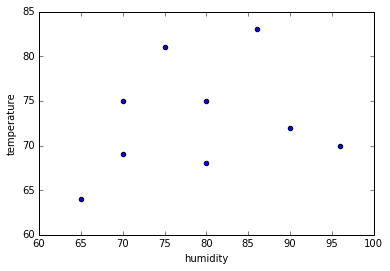

In [15]:
#play tennis 
weather[(weather['play'] == 1)].plot(kind='scatter', x='humidity', y='temperature')

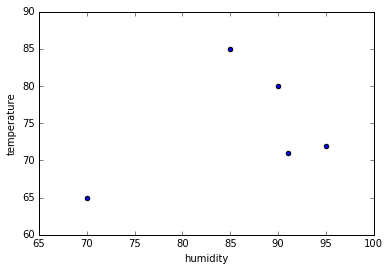

In [16]:
# NO tennis 
weather[(weather['play'] == 0)].plot(kind='scatter', x='humidity', y='temperature')

<h2 align="center"> Problem 2</h2><br>

<strong><p style="font-size:120%;">Question</strong> What problems did you have to deal with when working with these files? 

Most of these files were uniquely different from each other and because of that, it was difficult to automate cleaning of the files using in my case bash and python. Also some of the files had the population in thousands while others had the actual population.I  automated the place where WY, US or U.S., and AL occured (in the bash script "getLineNum.sh") in each text file to selectively get where the data tables start and stop for the "sed" command. 

In [101]:
import os 

# This cell helps with using sed later to get where to trim the files
data = ["data/st0009ts.txt", "data/st1019ts.txt",\
         "data/st2029ts.txt", "data/st3039ts.txt",\
         "data/st4049ts.txt", "data/st5060ts.txt",\
         "data/st6070ts.txt", "data/st7080ts.txt",\
         "data/st8090ts.txt"]

#each tuple is the location of the WY, US or (U.S.), and AL line occurrence
start_end_lines = [(72, 18, 24), (72, 18, 24), (72,18,24), (72, 18, 24),\
                  (70,16,22), (78, 19, 28), (75,19,25), \
                   (66,15),(62,12)]

In [142]:
for index, data_file in enumerate(data):
    start_line, end_line = np.min(start_end_lines[index]), np.max(start_end_lines[index])
    try:
        os.remove('data/1st0009ts.txt')
    except:
        pass
    !sed "$(($start_line-2)),$(($end_line))!d" "$data_file">>data/1st0009ts.txt

    if index == 0:
        df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        df = df.dropna()
    else:
        new_df = pd.read_fwf('data/1st0009ts.txt',header = 0, index_col=0, thousands=",")
        new_df = new_df.dropna()
        if index == 5:
            new_df.columns = ['1950', '1950.1', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960']
        if index == 7:
            new_df.drop('Fip', axis=0, inplace=True)
            new_df.index = new_df['Unnamed: 1'].values
            new_df.drop('Unnamed: 1', axis=1, inplace=True)
            new_df.columns = [str(1970 + i) for i in xrange(0,11)]
        if index == 8:
            new_df.columns = [str(1980 + i) for i in xrange(0,11)]      
        df = pd.concat([df, new_df], axis=1)
    if index == 6:
        df.rename(index={'U.S.': 'US'}, inplace=True)
        df = df.apply(lambda x: x*1000) #every index before index 6, has population in thousands
        
df = df.fillna(float(0.0)) #Changing the NaN's to zero to indicate no measurement
df

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
AK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,418491.0,449606.0,488417.0,513702.0,532495.0,544268.0,539309.0,541983.0,547159.0,550043.0
AL,1830000.0,1907000.0,1935000.0,1957000.0,1978000.0,2012000.0,2045000.0,2058000.0,2070000.0,2108000.0,...,3918531.0,3925266.0,3934102.0,3951820.0,3972523.0,3991569.0,4015264.0,4023844.0,4030222.0,4040587.0
AR,1314000.0,1341000.0,1360000.0,1384000.0,1419000.0,1447000.0,1465000.0,1484000.0,1513000.0,1545000.0,...,2293201.0,2294257.0,2305761.0,2319768.0,2327046.0,2331984.0,2342355.0,2342656.0,2346358.0,2350725.0
AZ,124000.0,131000.0,138000.0,144000.0,151000.0,158000.0,167000.0,176000.0,186000.0,196000.0,...,2810107.0,2889861.0,2968925.0,3067135.0,3183538.0,3308262.0,3437103.0,3535183.0,3622185.0,3665228.0
CA,1490000.0,1550000.0,1623000.0,1702000.0,1792000.0,1893000.0,1976000.0,2054000.0,2161000.0,2282000.0,...,24285933.0,24820009.0,25360026.0,25844393.0,26441109.0,27102237.0,27777158.0,28464249.0,29218164.0,29760021.0
CO,543000.0,581000.0,621000.0,652000.0,659000.0,680000.0,707000.0,733000.0,757000.0,775000.0,...,2977898.0,3061564.0,3133630.0,3169992.0,3208723.0,3237450.0,3260480.0,3262281.0,3275818.0,3294394.0
CT,910000.0,931000.0,952000.0,972000.0,987000.0,1010000.0,1033000.0,1057000.0,1077000.0,1097000.0,...,3128836.0,3139013.0,3162354.0,3180014.0,3201131.0,3223740.0,3247291.0,3271953.0,3283403.0,3287116.0
DC,278000.0,285000.0,290000.0,295000.0,302000.0,308000.0,313000.0,317000.0,321000.0,327000.0,...,636893.0,634174.0,632433.0,633382.0,634549.0,638269.0,636930.0,630432.0,624168.0,606900.0
DE,185000.0,187000.0,188000.0,190000.0,192000.0,194000.0,196000.0,197000.0,199000.0,201000.0,...,595975.0,599148.0,605458.0,611565.0,618280.0,627559.0,636947.0,647622.0,658273.0,666168.0
FL,530000.0,544000.0,565000.0,587000.0,599000.0,615000.0,628000.0,645000.0,684000.0,724000.0,...,10192774.0,10471407.0,10749851.0,11039925.0,11351118.0,11667505.0,11997283.0,12306395.0,12637715.0,12937926.0


<strong><p style="font-size:120%;"></strong> Plot the populations of Alaska and California over time. Don’t forget to label your axes.

In [143]:
ax = df[["CA", "AK"]].plot()
ax.set_xlabel("Year")
ax.set_ylabel("Population")

KeyError: "['CA' 'AK'] not in index"

<strong><p style="font-size:120%;"></strong> Plot the population of New England and the Southwest over time. Don’t forget to label your axes.

In [ ]:
# New England States: ME, VT, NH, MA, RI, CT 
# source: http://discovernewengland.org/about-new-england/new-england-states
# Southwest States: Arizona (AZ), New Mexico (NM), Nevada (NV), Utah (UT)) 
# source: http://wikitravel.org/en/Southwest_%28United_States_of_America%29

In [ ]:
df["New_England"] = df[["ME", "VT", "NH", "MA", "RI", "CT"]].sum(axis=1)
df["South_west"] = df[["AZ", "NM", "NV", "UT"]].sum(axis=1) 

In [ ]:
ax = df[["New_England", "South_west"]].plot()
ax.set_xlabel("Year")
ax.set_ylabel("Population")

<strong><p style="font-size:120%;">Question: </strong>What state showed the greatest change in population? Note that there is more than one way to quantify this

<h2 align="center"> Problem 3</h2><br>

<h2 align="center"> Problem 4</h2><br>

<strong><p style="font-size:120%;">Question: </strong>Build, plot and evaluate a decision tree on the wine dataset. Split the dat set into 75% for training and 25% for testing. Evaluate based on confusion matrix how well the model performed on training vs. testing. Document the steps taken.

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np

In [ ]:
#Downloading the dataset
!wget -O data/wine.data https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

#Information about the dataset     
!wget -O data/wine.names https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

<strong><p style="font-size:120%;">Attributes of the Dataset</strong> 

1) Alcohol <br>
2) Malic acid <br>
3) Ash <br>
4) Alcalinity of ash <br>
5) Magnesium <br>
6) Total phenols <br>
7) Flavanoids <br> 
8) Nonflavanoid phenols <br>
9) Proanthocyanins <br> 
10) Color intensity <br> 
11) Hue <br> 
12) OD280/OD315 of diluted wines <br>
13) Proline <br>

In [ ]:
wine = np.genfromtxt('wine.data', delimiter=',')
classes = wine[:, 0]
attributes = wine[:, 1:]
wine

<strong><p style="font-size:120%;">Dataset into Train and Test Data </strong> 

In [ ]:
#lets split into a test and training set
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(attributes, classes, test_size=0.25, random_state=2)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [ ]:
clf.score(X_test, Y_test)

<strong><p style="font-size:120%;">Confusion Matrix</strong>

In [ ]:
# taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
%matplotlib inline
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, ["1", "2", "3"], rotation=45)
    plt.yticks(tick_marks, ["1", "2", "3"])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#  confusion matrix
from sklearn.metrics import confusion_matrix
y_true = Y_test
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm)
plt.show()

In [ ]:
attributes_names = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
            'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
            'Hue', 'OD280/OD315 of diluted wines', 'Proline']
f = tree.export_graphviz(clf, out_file='workfile.dot', feature_names=attributes_names)

#graph = pydot.graph_from_dot_file('workfile.dot')
!dot -Tjpeg -o images/decisionTree.png -v workfile.dot

<img src = "images/decisionTree.png">

<h2 align="center"> Problem 5</h2><br>

In [ ]:
dataset = pd.read_csv('data/AHW_1.csv')
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
dataset.isnull().sum()

In [ ]:

print dataset[dataset['Sex']=='M'].dropna().describe()
print dataset[dataset['Sex']=='F'].dropna().describe()

plt.figure()
dataset[dataset['Sex']=='M'].plot(kind='box', title='Male')
plt.figure()
dataset[dataset['Sex']=='F'].plot(kind='box', title='Female')

In [ ]:
dataset[dataset['Sex']=='M'].plot(kind='scatter',x='Weight',y='Height')
dataset[dataset['Sex']=='F'].plot(kind='scatter',x='Weight',y='Height')

Height and wieght are not highly correlated for either gender.


In [ ]:
dataset['Weight_lbs'] = dataset['Weight']*2.20462
dataset[dataset['Sex']=='M'].plot(kind='scatter',x='Weight_lbs',y='Height')
dataset[dataset['Sex']=='F'].plot(kind='scatter',x='Weight_lbs',y='Height')

There is no significant difference in correlation due to the weight conversion.

In [ ]:
dataset = dataset.drop('Weight_lbs', 1)
dataset['weight+height'] = dataset['Weight']+dataset['Height']
dataset[dataset['Sex']=='M'].plot(kind='scatter',x='weight+height',y='Height')
dataset[dataset['Sex']=='F'].plot(kind='scatter',x='weight+height',y='Height')